## Traffic sign recognition



#### The steps of this project are the following  
1). Load Data from the pickle file  
2). Visualization of the data provided  
3). Preprocessing of dataset  
4). Model architecture  
5). Train, Validate and Test the model  
6). Find accuracy of trained model on test images  
7). Test model on new images  
8). Summarize model's performnce on new images.

### Load data from the pickle file

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

train_data = 'Data/train.p'
valid_data = 'Data/valid.p'
test_data = 'Data/test.p'

with open(train_data, mode = 'rb') as f:   # Open the file in ReadBinary mode
    train = pickle.load(f)
with open(valid_data, mode = 'rb') as f:
    valid = pickle.load(f)
with open(test_data, mode = 'rb') as f:
    test = pickle.load(f)



X_train, y_train = train['features'], train['labels']    # features and labels are fields present in the loaded data
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Number of training examples = 34799
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


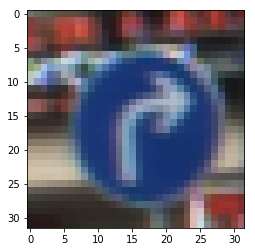

In [2]:
train_size = len(X_train)
valid_size = len(X_valid)
n_classes = len(set(y_train))
image_size = X_test[0].shape

print("Number of training examples =", train_size)
print("Number of validation examples =", valid_size)
print("Image data shape =", image_size)
print("Number of classes =", n_classes)


%matplotlib inline
# Select any random image and display it
index = random.randint(0,train_size)
image = X_train[index].squeeze()
plt.imshow(image)

### Visualization of dataset provided

A histogram depicting number of examples of each class present in the data set is shown

[]

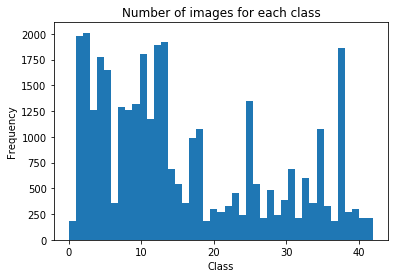

In [3]:
plt.hist(y_train, bins = n_classes)
plt.title("Number of images for each class")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.plot()

### Preprocessing of dataset
* Only preprocessing step that i have performed is normalization. I am not converting images to grayscale because i think having three channels can be useful for traffic sign classifications problems. For instance, if we consider classification of traffic light status, then having the RGB channels is mandatory. Also precautionary and warning signs have different coloring scheme and by using three channels we can also have an idea about how crucial that traffic sign is.

* Normalisation is done because of the fact that it scales the data in the range 0 to 1 and in this range, activation functions like logsig and tansig has maximum sensitivity so it leads to better convergence of learning. Though no such function is used in this project, it will still improve the learning curve

* The training data is also shuffled when training is done because dataset provided is grouped according to their classes and training for one class at one time and other at other time will lead to distortions in learning and will not be a good strategy.

One image from the given dataset and corresponding processed image is also shown below.


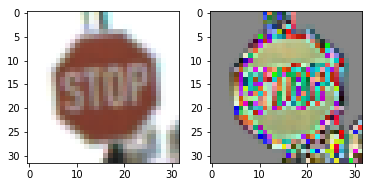

In [4]:
X_train_norm = (X_train - X_train.mean())/np.std(X_train)
X_valid_norm = (X_valid - X_valid.mean())/np.std(X_valid)
X_test_norm = (X_test - X_test.mean()) /np.std(X_test)

# Display an image before and after normalization
index = random.randint(0,train_size)
image_orig = X_train[index]
image_normed = X_train_norm[index]
plt.subplot(1,2,1)
plt.imshow(image_orig)
plt.subplot(1,2,2)
plt.imshow(image_normed)


## Model Architecture
For model architecture as suggested by course instructors, i have used Lenet architecture from begining. It has two convolutional layers followed by two fully connected layer and output layer. 
At first learning was done using unprocessed images and untuned hyper parameters, still it generated fairly good results. I could get validation accuracy of about 0.85 in under 50 epochs. Though learning initial errors were high, they seemed to decrease with every epochs.
Later on, after using normalised images, convergence got faster and tuning of hyper parameters brought required epochs for an accuracy of 0.93 to around 50 which were earlier around 400. An interesting thing that i noticed was that with proper tuning of hyper parameters we can get a very good leap at the first epoch itself. I am consistently getting around 0.75 to 0.80 accuracy at first epoch itself. But still, there is room for a lot of improvement because the learning stagnates after around 10 epochs and further improvement is slow and oscillatory in nature.
Minimum required accuracy is set to 0.95 and iterations are done untill model is not trained to that level i.e. number of epochs is not a hyperparameter here.

#### Convolutional network parameters:  
Number of convolution layers: 2  
Number of fully connected layers: 2  
Maxpooling : After each convolution layer  
Activation : Relu; after each convolution layer  
Convolution filter size: 5X5  
Convolution strides: 2  
Maxpool 'k': 2  




In [5]:
def conv2d(x,W,b,strides = 1):
    """Convolution layer wraper"""
    conv_net = tf.nn.conv2d(x,W,strides = [1, strides, strides, 1],padding = 'SAME' )
    conv_net = tf.nn.bias_add(conv_net,b)
    return conv_net

In [6]:
def maxpool2d(x, k = 2):
    """Maxpool wraper"""
    mp = tf.nn.max_pool(x,ksize = [1, k, k, 1],strides = [1, k, k, 1],padding = 'SAME')
    return mp

In [7]:
from tensorflow.contrib.layers import flatten
def conv_net(x,dropout):
    """Convolution network model"""
    cn1 = conv2d(x,weights['wc1'],biases['bc1'])
    cn1 = tf.nn.relu(cn1)
    cn1 = maxpool2d(cn1, k=2)
    

    cn2 = conv2d(cn1,weights['wc2'],biases['bc2'])
    cn2 = tf.nn.relu(cn2)
    cn2 = maxpool2d(cn2, k=2)

    fc0 = flatten(cn2)

    fc1 = tf.add(tf.matmul(fc0,weights['wfc1']),biases['bfc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,dropout)
    
    fc2 = tf.add(tf.matmul(fc1,weights['wfc2']),biases['bfc2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,dropout)

    out = tf.add(tf.matmul(fc2,weights['out']),biases['out'])

    return out

### Train, Validate and Test the model

#### Training parameters:
Learning rate used in training:0.001   
Batch Size: 128   
Optimizer used: Adam Optimizer  
Dropout conv_net : Not Applied  
Dropout at fully connected layer: 0.75  
Validation accuracy target : 0.95  
  



In [8]:
learn_rate = 0.001
batch_size = 128



weights = {
    'wc1' : tf.Variable(tf.truncated_normal([5,5,3,32],mean = 0, stddev = 0.1)),
    'wc2' : tf.Variable(tf.truncated_normal([5,5,32,64],mean = 0, stddev = 0.1)),
    'wfc1' : tf.Variable(tf.truncated_normal([8*8*64,1024],mean = 0, stddev = 0.1)),
    'wfc2' : tf.Variable(tf.truncated_normal([1024,400],mean = 0, stddev = 0.1)),
    'out'  : tf.Variable(tf.truncated_normal([400, n_classes], mean = 0, stddev = 0.1))
}

biases = {
    'bc1' : tf.Variable(tf.zeros(32)),
    'bc2' : tf.Variable(tf.zeros(64)),
    'bfc1': tf.Variable(tf.zeros(1024)),
    'bfc2': tf.Variable(tf.zeros(400)),
    'out' : tf.Variable(tf.zeros(n_classes))
}

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32,[None])
dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,depth=43, on_value = 1., off_value = 0., axis=-1)

logits = conv_net(x,dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [9]:
def evaluate(X_data, y_data):
    """Evaluate accuracy of model on given dataset"""
    total_accuracy = 0.0
    n_data = len(X_data)
    sess = tf.get_default_session()
    for start in range(0, n_data, batch_size):
        end = start + batch_size
        batch_x, batch_y = X_data[start:end], y_data[start: end]
        acc = sess.run(accuracy,feed_dict = {x: batch_x, y: batch_y, dropout : 1.0})
        total_accuracy += (acc*len(batch_x))
    return total_accuracy/n_data


In [41]:
from sklearn.utils import shuffle

save_file = './lenet'
with tf.Session() as sess:
    sess.run(init)

    print('Training....')
    print()
    epochs = 0
    validation_accuracy = 0.0
    while validation_accuracy < 0.95 :
        epochs += 1
        X_train_norm, y_train = shuffle(X_train_norm,y_train)
        for start in range(0,train_size,batch_size):
            end = start + batch_size
            batch_x, batch_y = X_train_norm[start:end],y_train[start:end]
            sess.run(optimizer, feed_dict = {x: batch_x, y: batch_y, dropout: 0.75})

        
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(epochs))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, save_file)
    print("Model saved")
   

Training....

EPOCH 1 ...
Validation Accuracy = 0.782

EPOCH 2 ...
Validation Accuracy = 0.868

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.915

EPOCH 5 ...
Validation Accuracy = 0.899

EPOCH 6 ...
Validation Accuracy = 0.926

EPOCH 7 ...
Validation Accuracy = 0.920

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.928

EPOCH 10 ...
Validation Accuracy = 0.929

EPOCH 11 ...
Validation Accuracy = 0.908

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 13 ...
Validation Accuracy = 0.921

EPOCH 14 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.949

EPOCH 16 ...
Validation Accuracy = 0.920

EPOCH 17 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Validation Accuracy = 0.938

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.943

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.940

EPOCH 24 ...
Validation Accur

### Find accuracy of the model on test images

In [42]:
save_file = './lenet'
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,save_file)
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.933


### Testing model on new images

These images are downloaded from internet. Their size is not 32 X 32; so we have to resize them first then preprocess and then apply them to our classification model.

In [43]:
from PIL import Image
def read_image(image_path):
    """Reads and returns image."""
    return Image.open(image_path)

### Resize Images
Resize them and save in a different folder

In [60]:
import os
import matplotlib.image as mpimg

width = 32
height = 32
test_image_folder = 'Test_images/'
resized_image_folder = 'Resized_test_images/'
test_images = [read_image(test_image_folder + i) for i in os.listdir(test_image_folder)]
j = 1
for image in test_images:
    image = image.resize((width, height), Image.ANTIALIAS) 
    image.save(resized_image_folder + str(j) + '.jpg')
    j += 1
resized_images = [read_image(resized_image_folder + i) for i in os.listdir(resized_image_folder)]
    


In [61]:
import numpy as np
def read_and_norm_resized_images(image_path):
    """Reads resized image and returns normalized version of it"""
    image = mpimg.imread(image_path)
    image = (image - image.mean())/np.std(image)
    return image

In [62]:
test_images = [read_and_norm_resized_images(resized_image_folder + i) for i in os.listdir(resized_image_folder)]

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,save_file)
    pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x : test_images, dropout: 1.0})
    print(pred)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.99997139e-01,   2.88437673e-06,   1.17867482e-09,
          2.36414187e-12,   1.04048773e-14],
       [  8.40298533e-01,   1.35727927e-01,   2.33415812e-02,
          4.77767986e-04,   7.09496308e-05],
       [  7.81274021e-01,   9.38590690e-02,   2.63157208e-02,
          2.40957625e-02,   1.67378169e-02],
       [  8.36890578e-01,   1.56466961e-01,   4.48168255e-03,
          4.76543733e-04,   3.94966162e-04]], dtype=float32), indices=array([[38,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [ 1,  4,  0, 14, 17],
       [17, 12,  5, 13, 37],
       [13, 35, 11, 12, 42],
       [13, 26, 35, 29, 25]], dtype=int32))


### Display classification results of new images.
Result contains top five predictions for each test image.

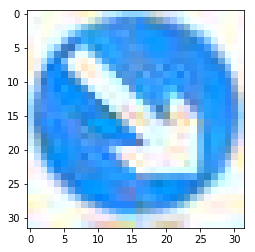

Classification result for above image: 
[38  0  1  2  3]


In [55]:
i = 0    
plt.imshow(resized_images[i])
plt.show()    
print("Classification result for above image: ")
print(pred[1][i])
print("============================================")
i = i+1

##### Correct

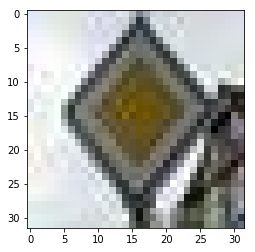

Classification result for above image: 
[12  0  1  2  3]


In [56]:
plt.imshow(resized_images[i])
plt.show()    
print("Classification result for above image: ")
print(pred[1][i])
print("============================================")
i = i+1

##### Correct

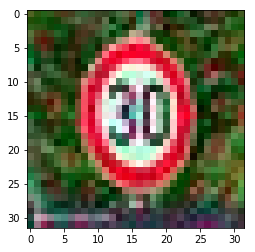

Classification result for above image: 
[ 1  4  0 14 17]


In [57]:
plt.imshow(resized_images[i])
plt.show()    
print("Classification result for above image: ")
print(pred[1][i])
print("============================================")
i = i+1

##### Correct

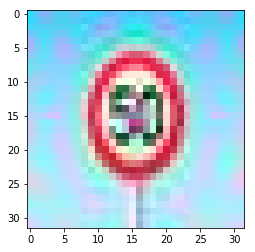

Classification result for above image: 
[17 12  5 13 37]


In [58]:
plt.imshow(resized_images[i])
plt.show()    
print("Classification result for above image: ")
print(pred[1][i])
print("============================================")
i = i+1

##### Incorrect

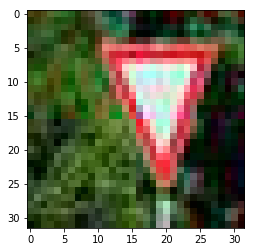

Classification result for above image: 
[13 35 11 12 42]


In [59]:
plt.imshow(resized_images[i])
plt.show()    
print("Classification result for above image: ")
print(pred[1][i])
print("============================================")
i = i+1

##### Correct

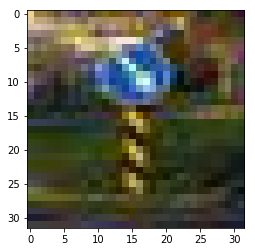

Classification result for above image: 
[13 26 35 29 25]


In [63]:
plt.imshow(resized_images[i])
plt.show()    
print("Classification result for above image: ")
print(pred[1][i])
print("============================================")
i = i+1

##### Incorrect

### Performance with new images

Our model is classifying 4 out of 6 images correctly. So the crude accuracy on the unseen images is $0.67$ against the obtained test accuraacy of  $ 0.93 $

One thing to note from the output of these images is that first and last images correspond to same traffic sign 'Keep right' but the network is classifying the earlier one correctly with full ceratinity but the later one incorrectly.  
This might be because of the fact that the later image contains lot of extra stuff other than the traffic sign itself. This causes the unequal amout of image captured in the receptive field in training and testing. And this change in the capture of receptive field causes changes in perception and hence the different results. So, the images with lot of different stuffs than the traffic sign and images with size of the traffic sign different than that in the training set can be particularly difficult for our model to classify. One possible solution to this problem is to crop out the extra stuff out of the image and then apply the model.  
